# Project 1: Testing a Perceptual Phenomenon

Xiaodong TAN

# Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

In [18]:
#import data

import numpy as np
import pandas as pd

sample = pd.read_csv(r'~/Documents/NanoDegree-DataAnalyst/P1/stroopdata.csv')
sample 


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


# 1. What is our independent variable? What is our dependent variable?

Independent variable: the words that are displayed to the participants, in either congruent condition or incongruent condition

Dependant varaible: the time it takes the participants to name the ink colors, .i.e., the participants' response time

# 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Null hypothesis (H0): There is no significant difference between the response time needed to review congruent words and incongrent words.

H0: μ1 -  μ2 = 0

Alternative hypothesis (H1): There is significant difference between the response time needed to review congruent words and incongrent words.

H1: μ1 -  μ2 ≠ 0 

μ1 = the mean of the response time needed to review congruent words

μ2 = the mean of the response time needed to review incongruent words

For the project, as the following features were noticed, two-tailed dependent t-test /paired t-test or paired-samples t-test should be used.

1) The standard deviation of the population is not known. As a result, Z-test can not be used.
2) There are only two groups to compare. As a result, t-test can be used.
3) The same participants were tested for both congruent words and incongruent words. As a result, this is a  "within-subjects" or "repeated_measures" or "dependant sample" test.
4) The alternative hypotheis does not expect which mean is higher; it only expects the two means are different. As a result, two-tailed test should be used.

 # 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
 
 Mean and median were used to measure central tendency. 
 
 Standard deviation was used to measure variability.

In [35]:
congruent = sample ['Congruent'] 
incongruent = sample['Incongruent']

#Central tendency
congruent_mean = congruent.mean()
congruent_median = congruent.median()
incongruent_mean = incongruent.mean()
incongruent_median = incongruent.median()

#Variability
congruent_std = congruent.std()
incongruent_std = incongruent.std()

print "The mean of the response time of reviewing congruent words is ", round(congruent_mean, 4)
print "The median of the response time of reviewing congruent words is ", round(congruent_median, 4)
print "The mean of the response time of reviewing congruent words is ", round(incongruent_mean, 4)
print "The median of the response time of reviewing congruent words is ", round(incongruent_median, 4)
print ""
print "The standard deviation of the response time of reviewing congruent words is ", round(congruent_std, 4)
print "The standard deviation of the response time of reviewing incongruent words is ", round(incongruent_std, 4)


The mean of the response time of reviewing congruent words is  14.0511
The median of the response time of reviewing congruent words is  14.3565
The mean of the response time of reviewing congruent words is  22.0159
The median of the response time of reviewing congruent words is  21.0175

The standard deviation of the response time of reviewing congruent words is  3.5594
The standard deviation of the response time of reviewing incongruent words is  4.7971


# 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Boxplot is used and the following features were noticed:

1) The mean response time of reviewing incongruent words is higher than that of reviewing congruent words.

2) There are "outliers" for the incongruent words, which means there are respondentswho used much longer time than average to responses when reviewing incongruent words.


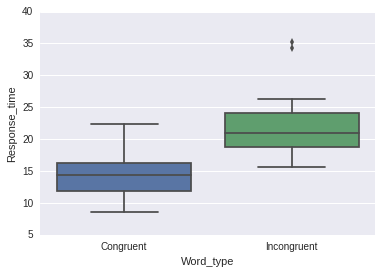

In [37]:
sample_unstack = sample.unstack().reset_index()
sample_unstack.columns = ['Word_type', 'Index', 'Response_time']

import seaborn as sns
sns.boxplot(x = "Word_type", y = "Response_time", data = sample_unstack)

# 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

At the confiedntial level α= 0.05, t-critical = 1.714/-1.714.

As p = 4.10300058571e-08 < 0.05 , the null hypotheis is rejected. That is, there is significant difference between the mean of the response time of reviewing congruent words and incongruent words. 

It was also noticed the t-statistic for this test is -8.02, which is much less than the t-critical value -1.714.

The result is what I expected

In [38]:
import scipy.stats as stats

t_test =  stats.ttest_rel(congruent, incongruent)

print "t statistics = ", round(t_test[0],2)
print "p-value = ", t_test[1]

t statistics =  -8.02
p-value =  4.10300058571e-08


Reference: 
http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score
http://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html
http://seaborn.pydata.org/generated/seaborn.boxplot.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
http://stattrek.com/online-calculator/t-distribution.aspx